In [1]:
import json
import pandas as pd
import plotly.express as px
import os

In [2]:
def read_file(path):
    with open(path, "r") as f:
        data = f.read()
    return json.loads(data)["results"]


def short_name(name):
    if name == "gpt-3.5-turbo-1106":
        return "gpt-3.5-turbo"
    if "/" in name:
        name = name.split("/")[1]
    for k in ["-Instruct", "-preview"]:
        if k in name:
            name = name.split(k)[0]
    return name

In [30]:
# root = "tmp_for_viz"
# files = {}
# keys = []
# for name in sorted(os.listdir(root), reverse=True):
#     if not name.endswith(".json"):
#         continue
#     fname = os.path.join(root, name)
#     r = read_file(fname)
#     my_keys = set(r.keys())
#     cur_keys = my_keys.difference(keys)
#     if not cur_keys:
#         print("DROP", name)
#         continue
#     if len(my_keys) != len(cur_keys):
#         print("OLD", name, len(my_keys) - len(cur_keys), len(cur_keys))
#     keys += cur_keys
#     files[fname] = cur_keys

In [3]:
with open("merged_run_outputs/merged.json") as f:
    results = json.loads(f.read())

In [13]:
data = []
# fnames = [
#     "full_run_outputs/250109T1800.json",
#     "full_run_outputs/250109T1802.json",
#     "full_run_outputs/250109T1803.json",
#     "full_run_outputs/250109T1804.json",
#     "full_run_outputs/250109T1806.json",
#     "full_run_outputs/250109T1808.json",
#     #    "full_run_outputs/250108T2041.json",
# ]

data2 = []

for key, value in results.items():
    x = key.split("|")
    name, fromtype = x[0].split("---DESCRIPTION-")
    desc_model = x[1].split("---COMPARISON")[0]
    cmp_model = x[2]
    values = value["total_tallies"]
    desc_model = short_name(desc_model)
    cmp_model = short_name(cmp_model)
    row = (name, fromtype, desc_model, cmp_model)
    data.append(row + ("human", values["Human"]))
    data.append(row + ("llm", values["LLM"]))
    data.append(row + ("invalid", values["Invalid"]))

    total = values["Human"] + values["LLM"] + values["Invalid"]
    data2.append((desc_model, cmp_model, name, fromtype, float(values["LLM"]) / total))

data2.append(("gpt-4-1106", "Humans", "product", "from_json_details", 0.29))
data2.append(("gpt-4-1106", "Humans", "paper", "write_xml_paper_abstract_control_word_count", 0.46))
data2.append(("gpt-3.5-turbo", "Humans", "product", "from_json_details", 0.28))
data2.append(("gpt-3.5-turbo", "Humans", "paper", "write_xml_paper_abstract_control_word_count", 0.60))

df = pd.DataFrame(data, columns=["name", "ftype", "desc_model", "cmp_model", "rtype", "rvalue"])
df2 = pd.DataFrame(data2, columns=["desc_model", "cmp_model", "name", "ftype", "value"])
df2.cmp_model.unique()

array(['gpt-4-1106', 'Mixtral-8x22B', 'Meta-Llama-3.1-70B', 'Qwen2.5-72B',
       'gpt-3.5-turbo', 'Meta-Llama-3.1-8B', 'Qwen2.5-7B', 'Humans'],
      dtype=object)

In [12]:
# MODELS = [
#     "gpt-4-1106",
#     "gpt-3.5-turbo",
#     "Mixtral-8x22B",
#     "Qwen1.5-4B",
#     "Qwen1.5-14B",
#     "Qwen1.5-72B",
#     "Meta-Llama-3.1-8B",
#     "Meta-Llama-3.1-70B",
# ]
# def add(name, desc_model, ftype, data):
#    for m, v in zip(MODELS, data):
#        data2.append((desc_model, m, name, ftype, v))
# # add("product", "gpt-4-1106", "from_json_product_listing", [0.87, 0.90, 0.96, 0.56, 0.82, 0.86, 0.86, 0.79])
# # add("product", "gpt-4-1106", "from_json_details", [0.88, 0.89, 0.95, 0.53, 0.84, 0.83, 0.84, 0.89])
# # add("product", "gpt-3.5-turbo", "from_json_details", [0.62, 0.74, 0.79, 0.52, 0.67, 0.64, 0.70, 0.64])




In [11]:

# df2 = pd.DataFrame(data2, columns=["desc_model", "cmp_model", "ftype", "value"])
# df2 = df2[df2.ftype == "from_json_details"].pivot(index='desc_model', columns='cmp_model', values='value')
# df2

for name, ftype in list(df[["name", "ftype"]].value_counts().index):
    print(name, ftype)
    #d = df2[(df2.ftype == ftype) & (df.name == name)]
    d = df2[(df2.ftype == ftype) & (df2.name == name)]
    tab = d.pivot(index='desc_model', columns='cmp_model', values='value')
    #print(tab)
    fig = px.imshow(tab, text_auto=".2f", color_continuous_scale='RdBu_r', height=700, color_continuous_midpoint=0.5)
    fig.update_layout(
        plot_bgcolor="rgba(0, 0, 0, 0)",
    )
    fig.show()
    


paper write_xml_paper_abstract_control_word_count


ValueError: Index contains duplicate entries, cannot reshape

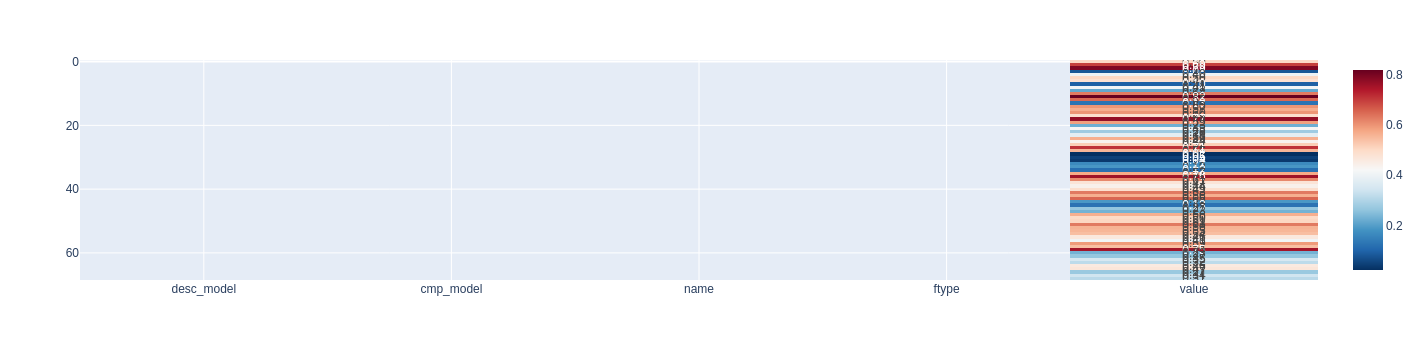

In [18]:
px.imshow(df2, text_auto=".2f", color_continuous_scale='RdBu_r')

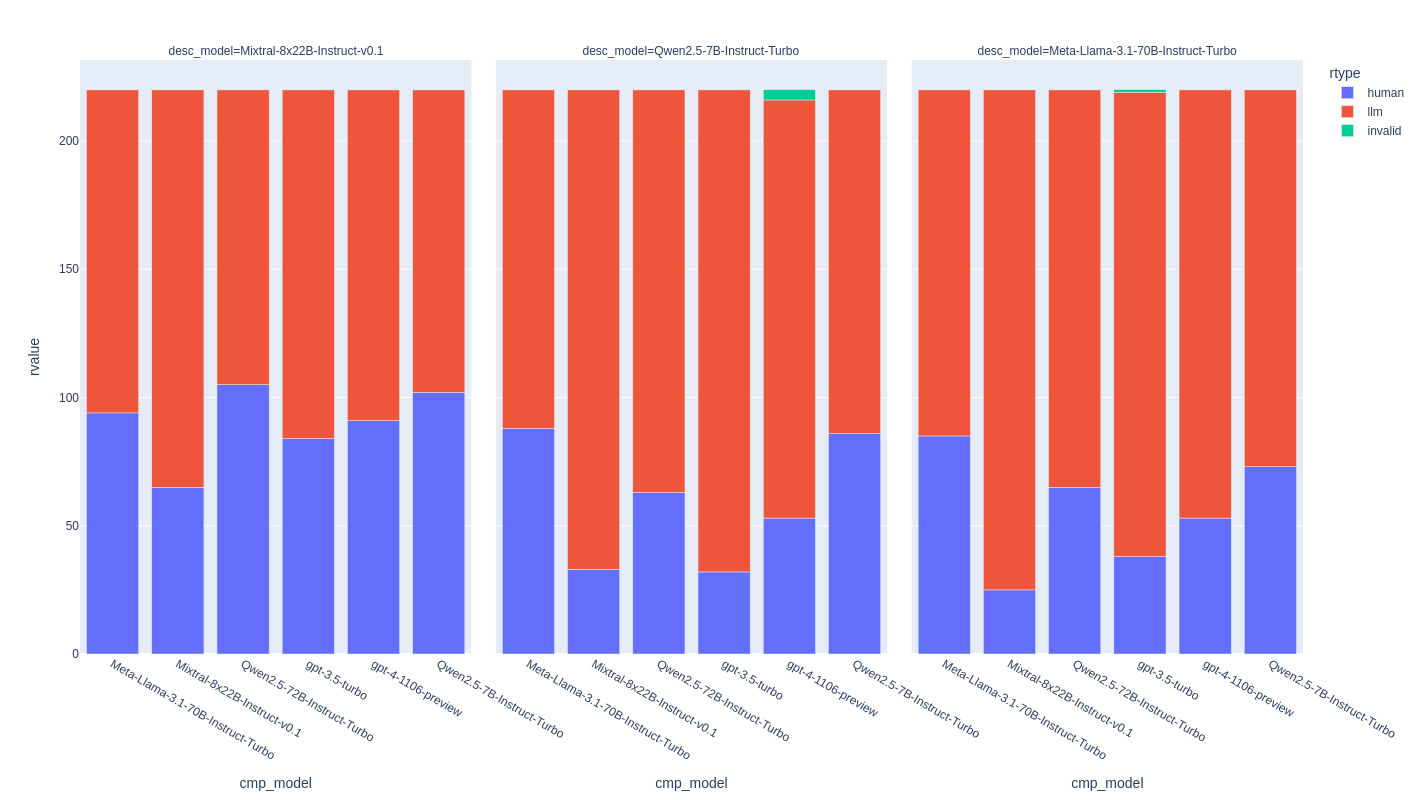

In [60]:


px.bar(df[df.ftype=="from_json_product_listing"], x="cmp_model", y="rvalue", facet_col="desc_model", height=800, color="rtype")

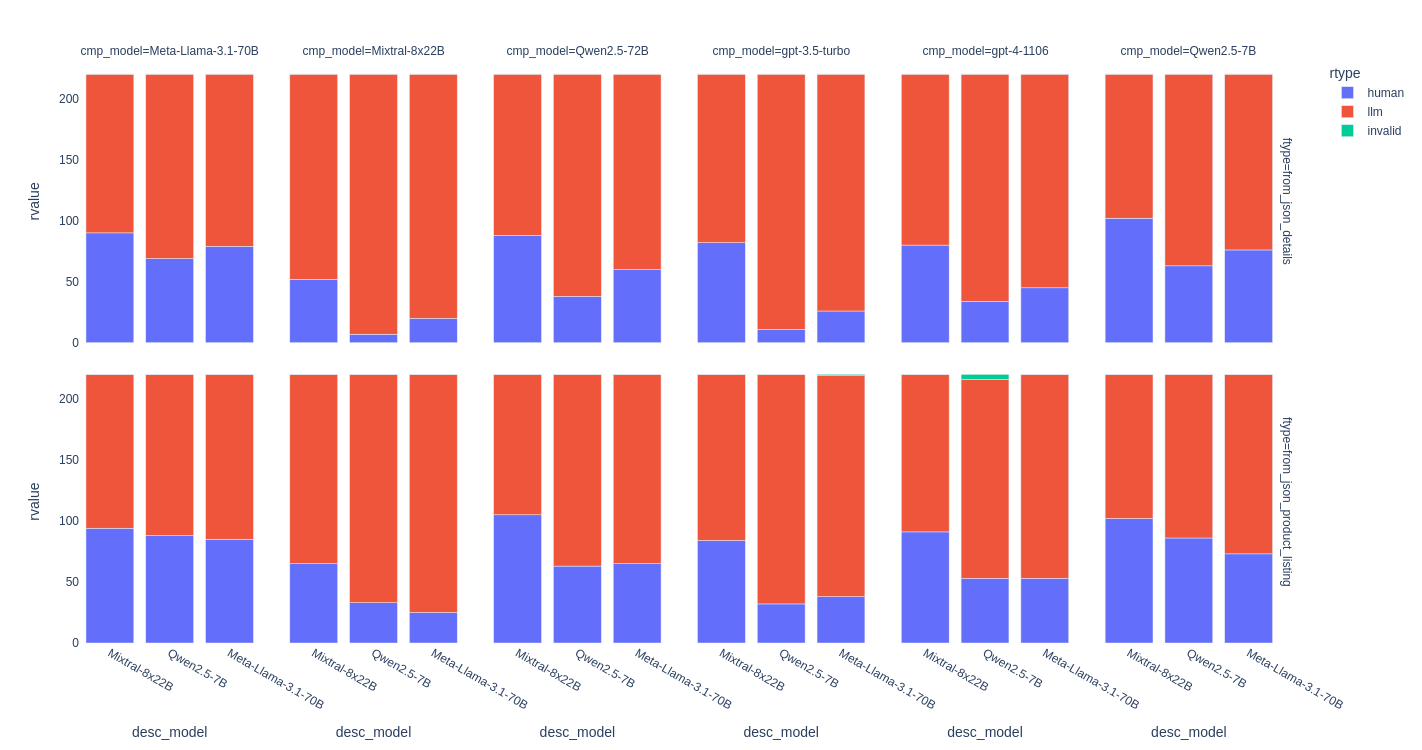

In [71]:
fig = px.bar(df, x="desc_model", y="rvalue", facet_col="cmp_model", facet_row="ftype", height=750, color="rtype")
fig.update_layout(
    plot_bgcolor="rgba(0, 0, 0, 0)",
)
# etype_order = {etype: i for i, etype in enumerate(df["cmp_model"].unique())}
# fig.update_xaxes(
#     tickvals=list(etype_order.values()),
#     ticktext=list(etype_order.keys()))

medal,nation,gold,silver,bronze
0,South Korea,24,13,11
1,China,10,15,8
2,Canada,9,12,12
